### Importing all the relevant libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the heart_failure.csv dataset into a Pandas DataFrame
data = pd.read_csv('heart_failure.csv')

### Checking for missing values in the nominal variable columns 

In [3]:
count_age = (data['age'] == 0 ).sum()
print(data['age'].count())
print(count_age) 

count_cp = (data['creatinine_phosphokinase'] == 0 ).sum()
print(data['creatinine_phosphokinase'].count())
print(count_cp)

count_ef = (data['ejection_fraction'] == 0 ).sum()
print(data['ejection_fraction'].count())
print(count_ef)

count_pl = (data['platelets'] == 0 ).sum()
print(data['platelets'].count())
print(count_pl)

count_sc = (data['serum_creatinine'] == 0 ).sum()
print(data['serum_creatinine'].count())
print(count_sc)

count_ss = (data['serum_sodium'] == 0 ).sum()
print(data['serum_sodium'].count())
print(count_ss)

299
0
299
0
299
0
299
0
299
0
299
0


### No missing values in the dataset

In [4]:
# Data exploration
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


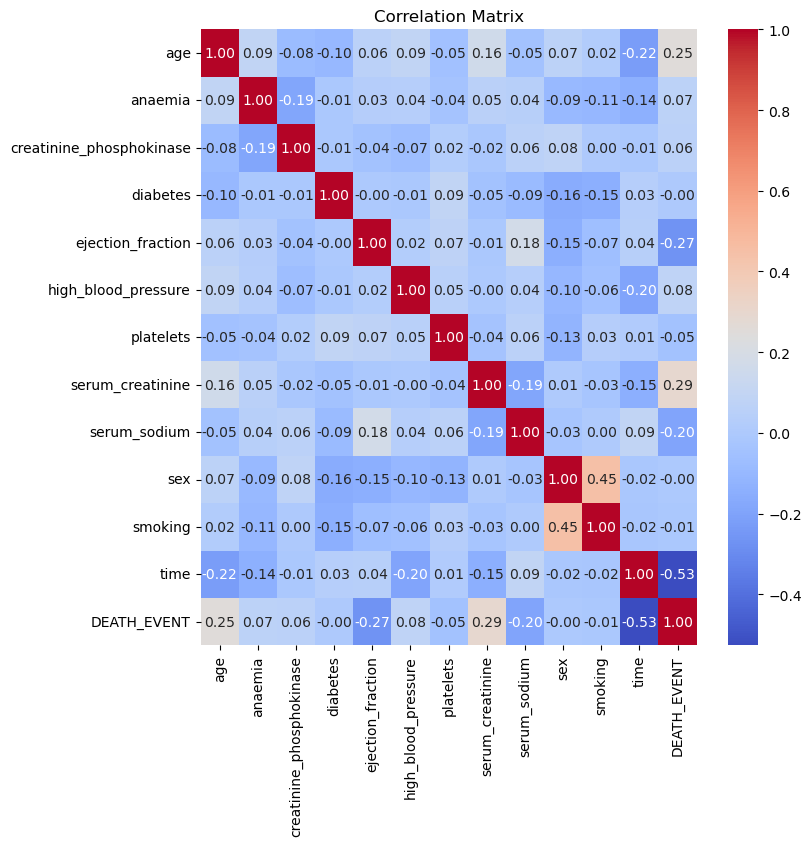

In [5]:
# Create a correlation matrix
corr_matrix = data.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 8))

# Generate a heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Set the title of the plot
ax.set_title('Correlation Matrix')

# Display the plot
plt.show()

### Co-relation between the variables in the dataset (Values between -1 and 1 , strong the co-relation the value will be closer to 1 weaker the co-relation the value will be close to -1) 

### Plotting a boxplot on age to detect outliers 

<AxesSubplot:>

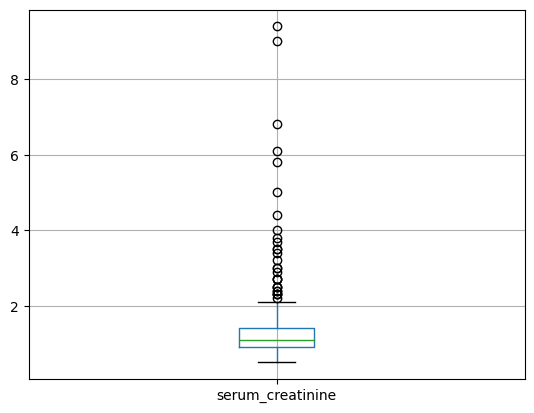

In [6]:
data.boxplot(column="serum_creatinine")

### The purpose of using boxplot for the column serum_creatinine is to find out the spread of the data points. From this boxplot we can say that 75% of the datapoints from that particular cloumn lie between 0.5 and 2

In [7]:
#Outlier handling 
# Filter the dataset to include only the rows where serum_creatinine is between 0.5 and 2
data_filtered = data[(data['serum_creatinine'] >= 0.5) & (data['serum_creatinine'] <= 2)]

# Print the filtered dataset to verify the filter worked correctly
print(data_filtered.count())

age                         265
anaemia                     265
creatinine_phosphokinase    265
diabetes                    265
ejection_fraction           265
high_blood_pressure         265
platelets                   265
serum_creatinine            265
serum_sodium                265
sex                         265
smoking                     265
time                        265
DEATH_EVENT                 265
dtype: int64


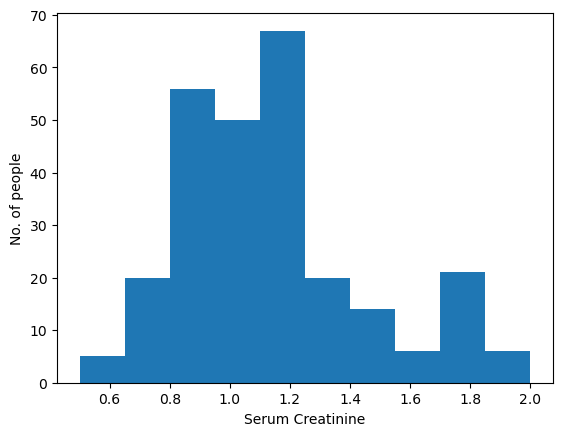

In [8]:
plt.hist(data_filtered['serum_creatinine'])
plt.xlabel("Serum Creatinine")
plt.ylabel("No. of people")
plt.show()

### Based on the boxplot, all the rows with serum_creatinine below 0.5 and above 2.0 were removed

In [9]:
# Create new labels for patients at risk of heart failure (positive class) and those not at risk (negative class)
risk_labels = np.where(data_filtered['DEATH_EVENT'] == 1, 1, 0)

# Drop the original binary classification labels and the time column
features = data_filtered.drop(['DEATH_EVENT', 'time'], axis=1)

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, risk_labels, test_size=0.30, random_state=42)

# Create instances of the Support Vector Machine Classifier, Decision Tree Classifier, and Logistic Regression Classifier
svc = SVC()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
lr = LogisticRegression()

In [11]:
# Train the models on the training data and make predictions on the testing data
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [12]:
print(y_test)

[0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0]


In [13]:
print(knn_pred)

[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0]


In [14]:
# Calculate the accuracy of each model
svc_acc = accuracy_score(y_test, svc_pred)
dtc_acc = accuracy_score(y_test, dtc_pred)
lr_acc = accuracy_score(y_test, lr_pred)
knn_acc = accuracy_score(y_test, knn_pred)


# Print the accuracy of each model
print('SVM Classifier Accuracy:', round(svc_acc*100, 2), '%')
print('Decision Tree Classifier Accuracy:', round(dtc_acc*100, 2), '%')
print('Logistic Regression Classifier Accuracy:', round(lr_acc*100, 2), '%')
print('KNN Classifier Accuracy:', round(knn_acc*100, 2), '%')

SVM Classifier Accuracy: 73.75 %
Decision Tree Classifier Accuracy: 67.5 %
Logistic Regression Classifier Accuracy: 77.5 %
KNN Classifier Accuracy: 67.5 %


### Performing cross-validation on SVC

In [15]:
# Define the number of folds for the cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation on the dataset
scores = cross_val_score(svc, features, risk_labels, cv=kfold)

# Print the accuracy scores for each fold and the average accuracy score
print("Accuracy Scores for Each Fold: ", scores)
print("Average Accuracy Score: ", np.mean(scores))

Accuracy Scores for Each Fold:  [0.67924528 0.83018868 0.60377358 0.71698113 0.75471698]
Average Accuracy Score:  0.7169811320754716


### Performing cross-validation on Logistic Regression

In [16]:
# Define the number of folds for the cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation on the dataset
scores = cross_val_score(lr, features, risk_labels, cv=kfold)

# Print the accuracy scores for each fold and the average accuracy score
print("Accuracy Scores for Each Fold: ", scores)
print("Average Accuracy Score: ", np.mean(scores))

Accuracy Scores for Each Fold:  [0.75471698 0.79245283 0.71698113 0.73584906 0.88679245]
Average Accuracy Score:  0.7773584905660378


### Performing cross-validation on Descision Tree Classifier 

In [17]:
# Define the number of folds for the cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation on the dataset
scores = cross_val_score(dtc, features, risk_labels, cv=kfold)

# Print the accuracy scores for each fold and the average accuracy score
print("Accuracy Scores for Each Fold: ", scores)
print("Average Accuracy Score: ", np.mean(scores))

Accuracy Scores for Each Fold:  [0.58490566 0.71698113 0.66037736 0.71698113 0.67924528]
Average Accuracy Score:  0.6716981132075471


### Performing cross-validation on K-Nearest Neighbors

In [18]:
# Define the number of folds for the cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation on the dataset
scores = cross_val_score(knn, features, risk_labels, cv=kfold)

# Print the accuracy scores for each fold and the average accuracy score
print("Accuracy Scores for Each Fold: ", scores)
print("Average Accuracy Score: ", np.mean(scores))

Accuracy Scores for Each Fold:  [0.67924528 0.66037736 0.56603774 0.60377358 0.67924528]
Average Accuracy Score:  0.6377358490566036


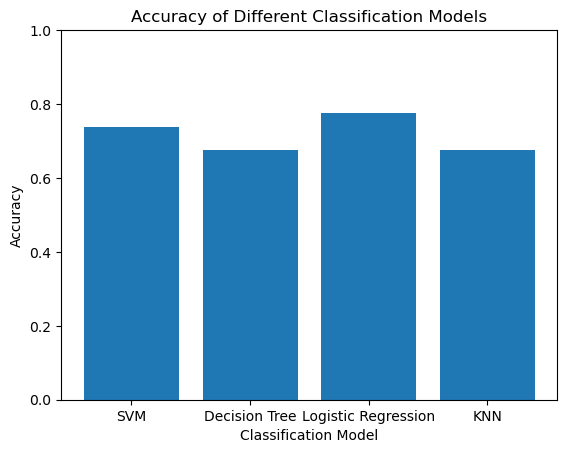

In [19]:
# Create a bar graph comparing the accuracies of the three models
models = ['SVM', 'Decision Tree', 'Logistic Regression', 'KNN']
accuracy = [svc_acc, dtc_acc, lr_acc, knn_acc]

plt.bar(models, accuracy)
plt.ylim([0, 1])
plt.title('Accuracy of Different Classification Models')
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')
plt.show()